In [31]:
import sys
sys.path.append('..')
from settings import *
# from lattice/opticallattice import *
from lattice.opticallattice import *
import matplotlib.colors as colors

C:\Users\janet\AppData\Local\Temp\ipykernel_41860\3527954335.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(hbar/mass/trap_freq/2/pi)


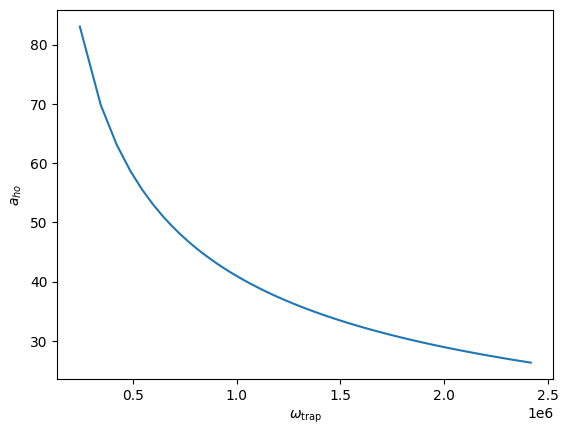

In [26]:
def trap_freq2a_ho(trap_freq):
    return np.sqrt(hbar/mass/trap_freq/2/pi)


pinn = OpticalLattice1D(a=752e-9)

U = np.linspace(0,1,100)*1e8
omega_trap = pinn.trap_freq(U=U)
a_ho = trap_freq2a_ho(omega_trap)

plt.plot(omega_trap, a_ho*1e9)
plt.xlabel('$\\omega_\\text{trap}$')
plt.ylabel('$a_{ho}$')

sigmax = np.array([[0,1],[1,0]])
sigmaz = np.array([[1,0],[0,-1]])

In [32]:
from scipy.special import assoc_laguerre as L
from math import factorial
from scipy.linalg import expm


omega_trap = 2e6
a_ho = trap_freq2a_ho(omega_trap)


n_max = 10

T = 150e-6
rho = np.exp(-hplanck*omega_trap/(kB*T))

ns = np.arange(n_max)

  
cn = np.array([rho**n for n in ns])
cn = cn/cn.max()

eta = (2*pi/0.671e-6)*np.sqrt(7)/2*np.sqrt(hbar/2/mass/omega_trap/2/pi)
print(eta)

0.25356506130028567


In [33]:
eta = 0.3
n = 10
# psi_ext = cn.reshape((n,1))
psi_ext = np.zeros((n,1))
psi_ext[1] = 1
psi_spin = np.array([1,0]).reshape((2,1))
psi0 = np.kron(psi_ext, psi_spin)

rho0 = psi0 @ psi0.T

H0 = np.kron(np.diag(np.arange(n)+0.5)*omega_trap, np.eye(2))

H_ext = np.eye(n) * 0.0j
for i in range(n):
    for j in range(n):
        if i <= j :
            H_ext[i,j] = np.sqrt(factorial(i)/factorial(j))*(1j*eta)**(j-i)*L(eta**2, i, k=j-i)*np.exp(-eta**2/2)
        else:
            H_ext[i,j] = (np.sqrt(factorial(j)/factorial(i))*(1j*eta)**(i-j)*L(eta**2, j, k=i-j)*np.exp(-eta**2/2)).conj()


In [34]:
def raman_spectrum(eta=0.3, init=0, omega_trap=2e6, omg=100e3, sigma_dopper=0.6e6):
    # eta = 0.5
    n = 10
    # psi_ext = cn.reshape((n,1))
    psi_ext = np.zeros((n,1))
    psi_ext[init] = 1
    psi_spin = np.array([1,0]).reshape((2,1))
    psi0 = np.kron(psi_ext, psi_spin)

    rho0 = psi0 @ psi0.T

    H0 = np.kron(np.diag(np.arange(n)+0.5)*omega_trap, np.eye(2))

    H_ext = np.eye(n) * 0.0j
    for i in range(n):
        for j in range(n):
            if i <= j :
                H_ext[i,j] = np.sqrt(factorial(i)/factorial(j))*(1j*eta)**(j-i)*L(eta**2, i, k=j-i)*np.exp(-eta**2/2)
            else:
                H_ext[i,j] = (np.sqrt(factorial(j)/factorial(i))*(1j*eta)**(i-j)*L(eta**2, j, k=i-j)*np.exp(-eta**2/2)).conj()

    delta_list = np.linspace(-5e6, 5e6, 1000)

    delta_dopper_list = delta_list*4

    # omg = 100e3
    t = 0.5/omg/eta
    t = 100e-6


    p = []

    for delta in delta_list:

        
        H_spin = 0.5*omg*sigmax
        H = H0 + np.kron(H_ext, H_spin) + np.kron(np.eye(n), 0.5*(delta)*sigmaz)
        

        psi = expm(-1j*2*pi*H*t) @ psi0

        p.append((np.abs(psi[1::2])**2).sum())

    p = np.array(p)

    # delta_doppler = .6e6

    p_doppler = 0
    for i, delta in enumerate(delta_list):
        p_doppler += np.exp(-(delta_dopper_list-delta)**2/2/sigma_dopper**2/2)*p[i]

        
    return p_doppler

In [35]:
omega_trap = 2.5e6

eta = (2*pi/0.671e-6)*np.sqrt(7)/2*np.sqrt(hbar/2/mass/omega_trap/2/pi)
print(eta)
# eta = 0.5

n_max = 10

T = 100e-6
rho = np.exp(-hplanck*omega_trap/(kB*T))

ns = np.arange(n_max)

cn = np.array([rho**n for n in ns])
cn = cn/cn.max()


omg_list = [.1e6, .5e6, 1e6, 1.5e6, 2e6]

p_list = []

for omg in omg_list:

    p = []
    for i in range(len(cn)):
        p.append(raman_spectrum(eta=eta, init=i, omega_trap=omega_trap, omg=omg, sigma_dopper=0.05e6)*cn[i])

    p = np.array(p)

    p = np.sum(p,axis=0)
    p_list.append(p)



0.226795485514536


In [36]:
delta_list = np.linspace(-20e6, 20e6, len(p1))

i = np.argmin(np.abs(delta_list))

for j in range(len(p_list)):
    plt.plot(delta_list, p_list[j]/p_list[j].max(), label='Rabi rates:%.1f MHz'%(omg_list[j]/1e6))
# plt.plot(delta_list, pn[2,:])

plt.xlim([-2.2e6, 4.8e6])
plt.legend()
plt.grid()
plt.xlabel('Raman detuning')

NameError: name 'p1' is not defined

In [ ]:
omega_trap = 2.5e6

eta = (2*pi/0.671e-6)*np.sqrt(7)/2*np.sqrt(hbar/2/mass/omega_trap/2/pi)
print(eta)
# eta = 0.5

n_max = 10

T = 100e-6
rho = np.exp(-hplanck*omega_trap/(kB*T))

ns = np.arange(n_max)

cn = np.array([rho**n for n in ns])
cn = cn/cn.max()


T_list = [1e-6, 100e-6, 300e-6]

p_list = []

for T in T_list:
    rho = np.exp(-hplanck*omega_trap/(kB*T))

    ns = np.arange(n_max)

    cn = np.array([rho**n for n in ns])
    cn = cn/cn.max()

    p = []
    for i in range(len(cn)):
        p.append(raman_spectrum(eta=eta, init=i, omega_trap=omega_trap, omg=1e6, sigma_dopper=0.4e6)*cn[i])

    p = np.array(p)

    p = np.sum(p,axis=0)
    p_list.append(p)

0.226795485514536


Text(0.5, 0, 'Raman detuning')

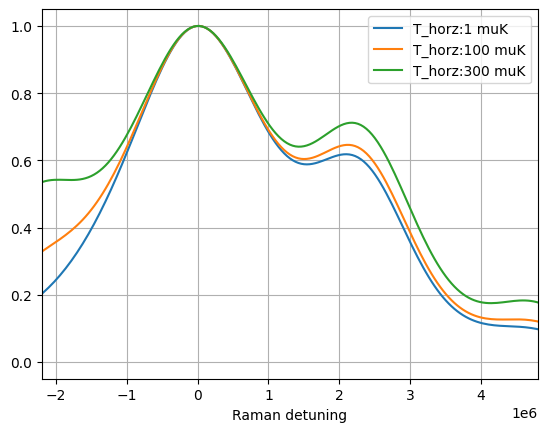

In [ ]:
delta_list = np.linspace(-20e6, 20e6, len(p1))

i = np.argmin(np.abs(delta_list))

for j in range(len(p_list)):
    plt.plot(delta_list, p_list[j]/p_list[j][i], label='T_horz:%d muK'%(T_list[j]*1e6))
# plt.plot(delta_list, pn[2,:])

plt.xlim([-2.2e6, 4.8e6])
plt.legend()
plt.grid()
plt.xlabel('Raman detuning')

In [ ]:



omega_trap_list = [1e6, 1.5e6, 2e6, 2.5e6]

p_list = []

for omega_trap in omega_trap_list:

    # omega_trap = 2.5e6

    eta = (2*pi/0.671e-6)*np.sqrt(7)/2*np.sqrt(hbar/2/mass/omega_trap/2/pi)
    print(eta)
    # eta = 0.5

    n_max = 10

    T = 100e-6
    rho = np.exp(-hplanck*omega_trap/(kB*T))

    ns = np.arange(n_max)

    cn = np.array([rho**n for n in ns])
    cn = cn/cn.max()


    p = []
    for i in range(len(cn)):
        p.append(raman_spectrum(eta=eta, init=i, omega_trap=omega_trap, omg=1e6, sigma_dopper=0.4e6)*cn[i])

    p = np.array(p)

    p = np.sum(p,axis=0)
    p_list.append(p)

0.3585951486348292
0.29279171279760774
0.25356506130028567
0.226795485514536


Text(0.5, 0, 'Raman detuning')

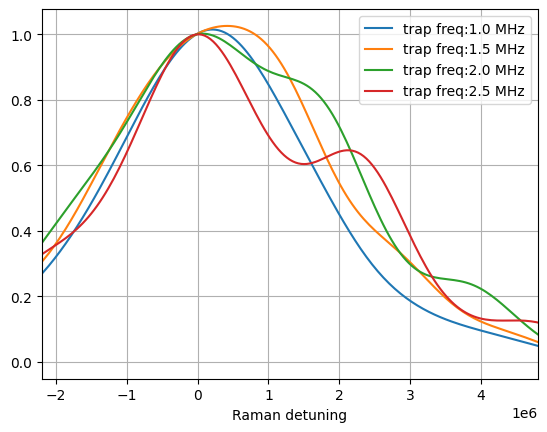

In [ ]:
delta_list = np.linspace(-20e6, 20e6, len(p1))

i = np.argmin(np.abs(delta_list))

for j in range(len(p_list)):
    plt.plot(delta_list, p_list[j]/p_list[j][i], label='trap freq:%.1f MHz'%(omega_trap_list[j]*1e-6))
# plt.plot(delta_list, pn[2,:])

plt.xlim([-2.2e6, 4.8e6])
plt.legend()
plt.grid()
plt.xlabel('Raman detuning')

In [637]:



eta_list = [0.1, 0.3, 0.5]

p_list = []

for eta in eta_list:

    # eta = 0.5

    n_max = 10

    T = 100e-6
    rho = np.exp(-hplanck*omega_trap/(kB*T))

    ns = np.arange(n_max)

    cn = np.array([rho**n for n in ns])
    cn = cn/cn.max()


    p = []
    for i in range(len(cn)):
        p.append(raman_spectrum(eta=eta, init=i, omega_trap=2.5e6, omg=1.5e6, sigma_dopper=0.4e6)*cn[i])

    p = np.array(p)

    p = np.sum(p,axis=0)
    p_list.append(p)

Text(0.5, 0, 'Raman detuning')

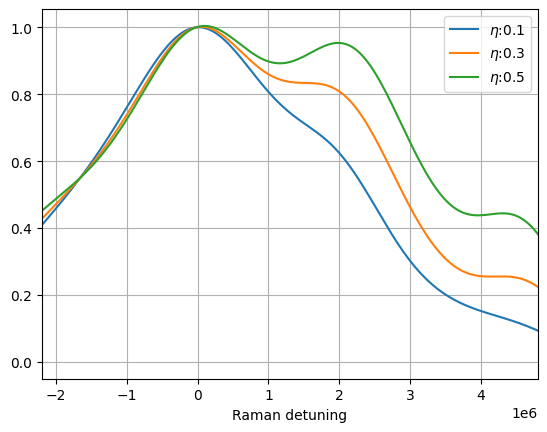

In [638]:
delta_list = np.linspace(-20e6, 20e6, len(p1))

i = np.argmin(np.abs(delta_list))

for j in range(len(p_list)):
    plt.plot(delta_list, p_list[j]/p_list[j][i], label=r'$\eta$:%.1f'%(eta_list[j]))
# plt.plot(delta_list, pn[2,:])

plt.xlim([-2.2e6, 4.8e6])
plt.legend()
plt.grid()
plt.xlabel('Raman detuning')

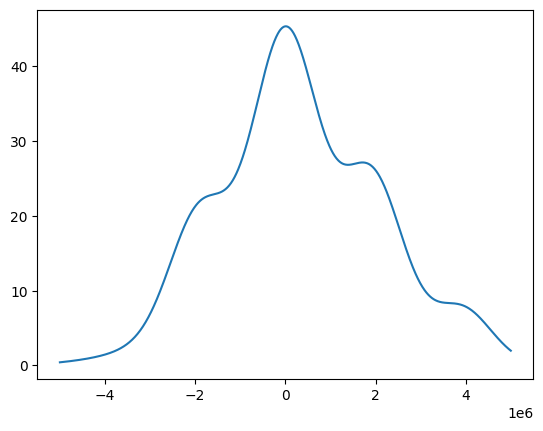

In [268]:
xs = np.linspace(-5e6, 5e6, 1000)

omg = 500e3
t = 0.5/omg/eta
t = 100e-6


p = []

for delta in xs:

    
    H_spin = 0.5*omg*sigmax
    H = H0 + np.kron(H_ext, H_spin) + np.kron(np.eye(n), 0.5*(delta)*sigmaz)
    

    psi = expm(-1j*2*pi*H*t) @ psi0

    p.append((np.abs(psi[1::2])**2).sum())

p = np.array(p)

delta_doppler = 0.6e6

p_doppler = 0
for i, delta in enumerate(delta_list):
    p_doppler += np.exp(-(delta_list-delta)**2/2/delta_doppler**2)*p[i]

plt.plot(delta_list, p_doppler)

In [232]:
np.sqrt(np.log(2)*2)

1.1774100225154747

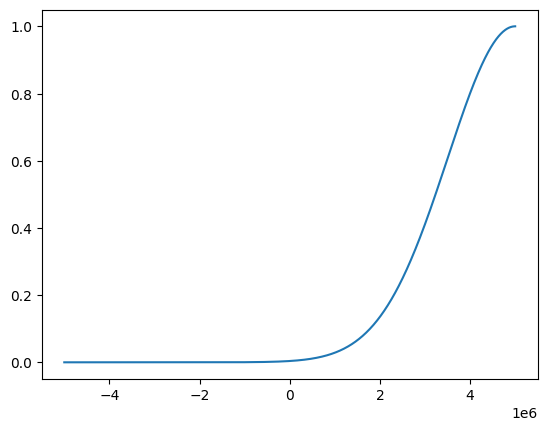

In [204]:
delta_doppler = 1.5e6
plt.plot(delta_list, np.exp(-(delta_list-delta)**2/2/delta_doppler**2))

In [180]:
2*pi/0.671*0.5*0.5

2.3409781323321854

In [189]:
omega_trap_list = np.linspace(1.5e6,2.5e6, 200)

delta_list = np.linspace(-5e6, 5e6, 1000)

p_omega_trap = []


for omega_trap in omega_trap_list:

    H0 = np.kron(np.diag(np.arange(n)+0.5)*omega_trap, np.eye(2))

    

    omg = 100e3
    t = 0.5/omg/eta
    t = 200e-3

    p = []

    for delta in delta_list:

        
        H_spin = 0.5*omg*sigmax
        H = H0 + np.kron(H_ext, H_spin) + np.kron(np.eye(n), 0.5*(delta)*sigmaz)
        

        psi = expm(-1j*2*pi*H*t) @ psi0

        p.append((np.abs(psi[1::2])**2).sum())

    # p = np.array(p)

    p_omega_trap.append(p)

p_omega_trap = np.array(p_omega_trap)

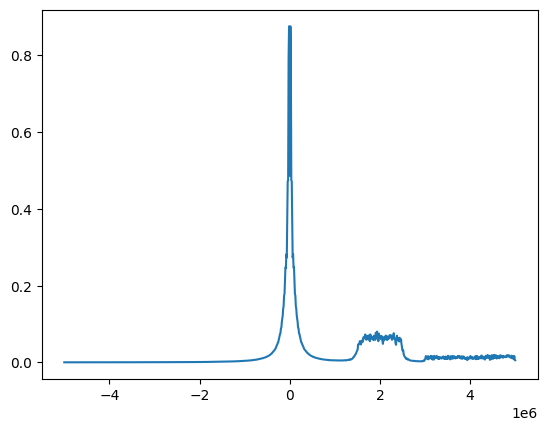

In [190]:
plt.plot(delta_list, np.mean(p_omega_trap, axis=0))

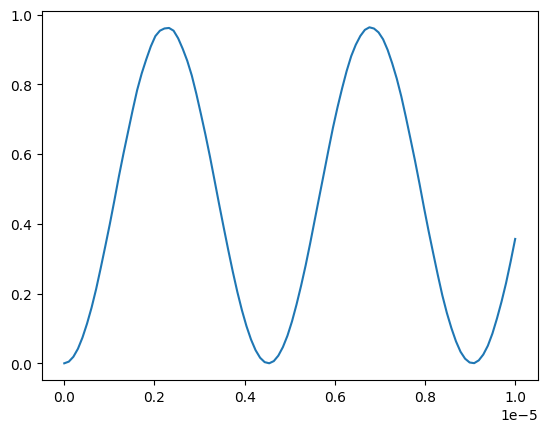

In [188]:
omega_trap = 2.5e6

omg = 500e3
t = 0.5/omg/eta
t = 100e-6


time_list = 0.5/omg/eta*np.linspace(0,5,100)

p = []

for t in time_list:

    
    H_spin = 0.5*omg*sigmax
    H = H0 + np.kron(H_ext, H_spin) + np.kron(np.eye(n), 0.5*(omega_trap)*sigmaz)
    

    psi = expm(-1j*2*pi*H*t) @ psi0

    p.append((np.abs(psi[3])**2).sum())

p = np.array(p)

plt.plot(time_list, p)

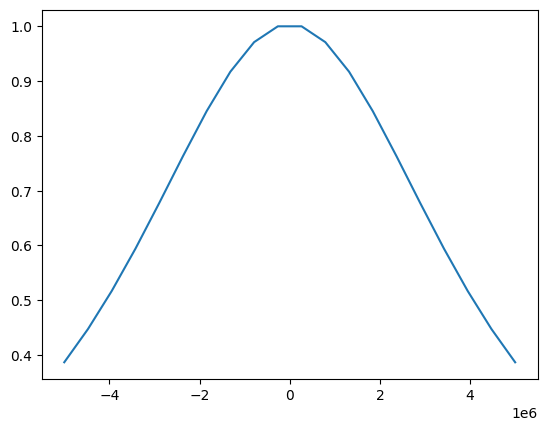

In [ ]:
xs = np.linspace(-5e6, 5e6, 20)

ps = []

for doppler_lw in [1.6e6]:
    ds = np.linspace(-5e6, 5e6, 1000) + 12345
    n_db = np.exp(-(ds/doppler_lw)**2/2)

    omg = 3e6
    t = 100e-6

    p = []

    for delta in xs:

        pd = []

        for delta_db in ds:
        
            H_spin = 0.5*omg*sigmax
            H = H0 + np.kron(H_ext, H_spin) + np.kron(np.eye(n), 0.5*(delta+delta_db)*sigmaz)
            
            pc = []
            for i in range(n_max):

                psi0 = psi_list[i]
                psi = expm(-1j*H*t*2*pi) @ psi0
                pc.append((np.abs(psi[1::2])**2).sum())

            pc = np.array(pc)

            pd.append(np.sum(pc*cn)/cn.sum())
        
        pd = np.array(pd)

        p.append(np.sum(pd*n_db)/np.sum(n_db))


    ts = np.arange(100)*1e-6

    p = np.array(p)
    ps.append(p)

    plt.plot(xs, p/p.max())



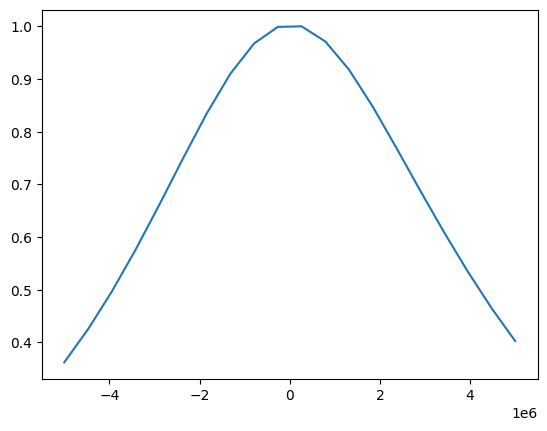

In [ ]:
xs = np.linspace(-5e6, 5e6, 20)

ps = []

for doppler_lw in [1.6e6]:
    ds = np.linspace(-5e6, 5e6, 1000) + 12345
    n_db = np.exp(-(ds/doppler_lw)**2/2)

    omg = 3e6
    t = 100e-6

    p = []

    for delta in xs:

        pd = []

        for delta_db in ds:
        
            H_spin = 0.5*omg*sigmax
            H = H0 + np.kron(H_ext, H_spin) + np.kron(np.eye(n), 0.5*(delta+delta_db)*sigmaz)

            psi = expm(-1j*H*t*2*pi) @ psi0

            pd.append((np.abs(psi[1::2])**2).sum())
        
        pd = np.array(pd)

        p.append(np.sum(pd*n_db)/np.sum(n_db))


    ts = np.arange(100)*1e-6

    p = np.array(p)
    ps.append(p)

    plt.plot(xs, p/p.max())



-0.15098882392874508


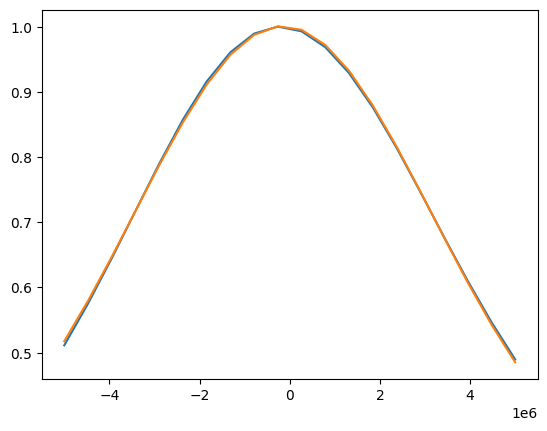

In [ ]:
y = p/p.max()
coeff, var_matrix = curve_fit(Gauss1d, xs, y, p0=[0.4, 0, 1e6, 0])
print(coeff[1]*1e-6)

y_fit = Gauss1d(xs, *coeff)
plt.plot(xs, y)
plt.plot(xs, y_fit)


In [ ]:
H_ext

array([[0.93225743, 0.34918308, 0.09248164, 0.01999918, 0.00374541],
       [0.34918308, 0.80146864, 0.45917985, 0.15269208, 0.0385955 ],
       [0.09248164, 0.45917985, 0.67985419, 0.52193745, 0.20571714],
       [0.01999918, 0.15269208, 0.52193745, 0.56698507, 0.55819506],
       [0.00374541, 0.0385955 , 0.20571714, 0.55819506, 0.46244727]])

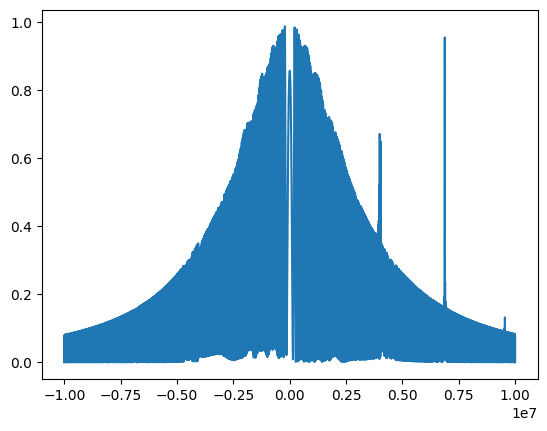

In [ ]:
xs = np.linspace(-10e6, 10e6, 10000)

ps = []

for delta in xs:
    H_spin = 0.5*omg*sigmax
    H = H0 + np.kron(H_ext, H_spin) + np.kron(np.eye(n), 0.5*(delta)*sigmaz)
    psi = expm(-1j*H*t*2*pi) @ psi0
    ps.append((np.abs(psi[1::2])**2).sum())

ps = np.array(ps)
plt.plot(xs, ps)

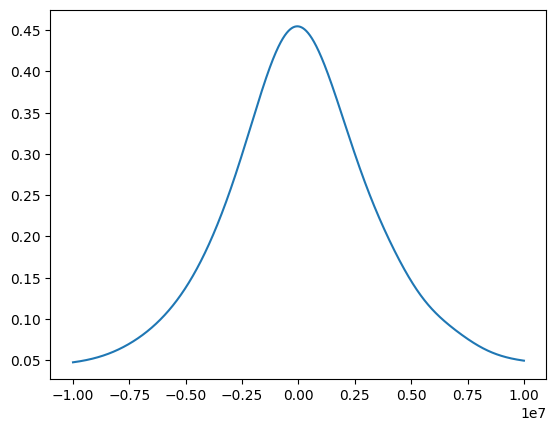

In [ ]:
deltas = xs

doppler_lw = 1e6


y = []
for d in deltas:
    n_doppler = np.exp(-(deltas-d)**2/2/doppler_lw**2)
    y.append(np.sum(n_doppler*ps)/n_doppler.sum())

plt.plot(deltas, y)

In [ ]:
from scipy.optimize import curve_fit

def Gauss1d(x, a, mu, sigma, b):
    # A, mu, sigma, b = p
    return a*np.exp(-(x-mu)**2/(2.*sigma**2)) + b

coeff, var_matrix = curve_fit(Gauss1d, deltas, y, p0=[0.4, 0, 1e6, 0])
coeff[1]*1e-6

0.02503847811248188